In [2]:
using Statistics
using LinearAlgebra
using Plots


include("lsq_classifier_data.jl")

A = [ones(size(X)[2]) X'];

Theta = A\y;
v = Theta[1,:]
beta = Theta[2:51];
println("Beta and v (slope) values are : ", beta, v);

y_hat = X' * beta .+ v;
test_y_hat = X_test' * beta .+ v;
println("The error rate on training data is ",(sum(((y_hat).>0) .!=(y.==1)) + sum(((y_hat).<0) .!=(y.==-1)))/size(y)[1]/2);
println("The error rate on testing data is ",(sum(((test_y_hat).>0) .!=(y_test.==1)) + sum(((test_y_hat).<0) .!=(y_test.==-1)))/size(y_test)[1]/2);

Beta and v (slope) values are : [-0.013368564887362284, 0.043914619202142506, -0.029703277493729204, 0.0441447412881381, -0.07058131397505582, 0.007607031569404489, 0.14833182533722705, 0.02852393154963966, 0.019812521586858763, -0.12070927744292764, 0.013784598389068807, 0.07897384306339864, -0.016767001698145247, 0.03105477750315689, 0.006356245285928464, -0.09111311295164341, 0.0046968705247653515, -0.03371811652421457, 0.014237165383124077, -0.1715950849684703, 0.05418932576076964, -0.06405036863460692, -0.0446363886361793, 0.060640599059827535, 0.022398446473252752, 0.01634655578292057, 0.028027646705782807, 0.046686592731404526, -0.13392652651935205, -0.09059400055804874, -0.0879007600259256, 0.010548532354429147, -0.03467602240482772, -0.06877162458039814, -0.05169326750991447, 0.13547906032991633, 0.07853780188316374, 0.11922412326678362, 0.026479714104205146, -0.053715275373795564, -0.1858378466312867, -0.06173600519777898, -0.05090661312828648, -0.0026805843235918987, 0.00782

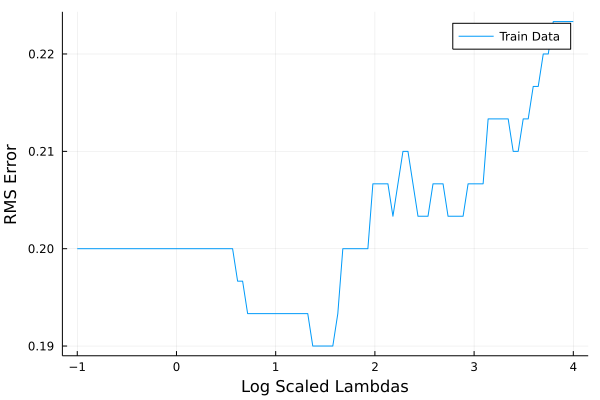

In [5]:

regularization_factor =  10 .^ range(-1,4,length = 100);
test_values = []
train_values = []
logvalues = []
for i in regularization_factor
    Theta = inv(transpose(A)*A + i*Matrix{Float64}(I,51,51)) * transpose(A) * y;
    v = Theta[1,:]
    beta = Theta[2:51];
    y_hat = X' * beta .+ v;
    # println("Beta and v (slope) values after regularization are : ", beta, v);
    test_y_hat = X_test' * beta .+ v;
    append!(train_values,(sum(((y_hat).>0) .!=(y.==1)) + sum(((y_hat).<0) .!=(y.==-1)))/size(y)[1]/2);
    append!(test_values,(sum(((test_y_hat).>0) .!=(y_test.==1)) + sum(((test_y_hat).<0) .!=(y_test.==-1)))/size(y_test)[1]/2);
    append!(logvalues,log10(i));
end

plot(logvalues, xlabel = "Log Scaled Lambdas", ylabel = "RMS Error", train_values, label = "Train Data")

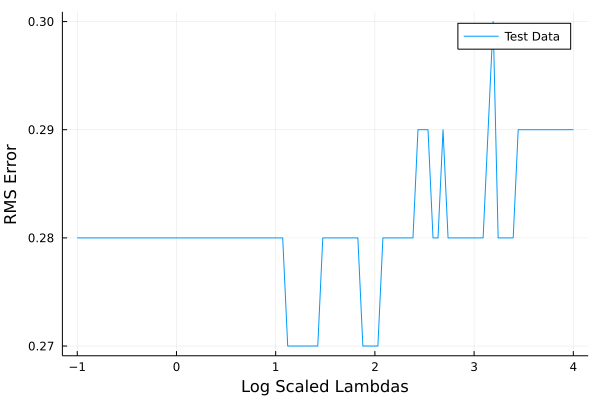

In [6]:
plot(logvalues, xlabel = "Log Scaled Lambdas", ylabel = "RMS Error", test_values, label = "Test Data")

In [7]:
println("Regularization value at minimum loss value for test data is ", regularization_factor[findmin(train_values)[2]])

Regularization value at minimum loss value for test data is 23.644894126454073
